# OSMnx features demo

Author: [Geoff Boeing](https://geoffboeing.com/)

Get street networks and other spatial data anywhere in the world from OpenStreetMap then analyze and visualize them.

More info:

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [Documentation and install instructions](https://osmnx.readthedocs.io)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Journal article and citation info](http://geoffboeing.com/publications/osmnx-complex-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  
This notebook provides a quick tour of some of OSMnx's key features including how to:

  - download/model street networks
  - calculate stats
  - visualize centrality
  - impute speeds/travel times and calculate shortest paths
  - attach and visualize elevation data and edge grades
  - download/model other infrastructure types
  - download points of interest data

In [2]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.2'

2022-01-13 23:31:04 Configured OSMnx 1.1.2
2022-01-13 23:31:04 HTTP response caching is on


## Working with street networks

2022-01-13 23:31:52 Pausing 1 seconds before making HTTP GET request
2022-01-13 23:31:53 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Kyiv%2C+Ukraine with timeout=180
2022-01-13 23:31:53 Resolved nominatim.openstreetmap.org to 184.104.226.109
2022-01-13 23:31:53 Downloaded 268.6kB from nominatim.openstreetmap.org
2022-01-13 23:31:53 Saved response to cache file "cache/11b6653719caace3d7c0a7cc7c358242188d762a.json"
2022-01-13 23:31:53 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:31:53 Constructed place geometry polygon(s) to query API
2022-01-13 23:31:53 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:31:53 Projected GeoDataFrame to epsg:4326
2022-01-13 23:31:53 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:31:53 Projected GeoDataFrame to epsg:4326
2022-01-13 23:31:53 Requesting data withi

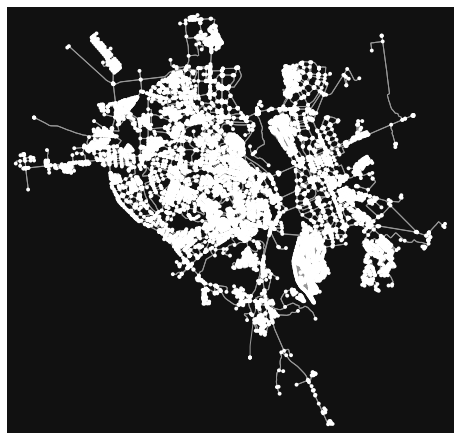

2022-01-13 23:32:33 Finished plotting the graph


In [4]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Kyiv, Ukraine", network_type="drive")
fig, ax = ox.plot_graph(G)

OSMnx geocodes the query "Piedmont, California, USA" to retrieve the place boundaries of that city from the Nominatim API, retrieves the drivable street network data within those boundaries from the Overpass API, constructs a graph model, then simplifies/corrects its topology such that nodes represent intersections and dead-ends and edges represent the street segments linking them. All of this is discussed in detail in the documentation and these examples.

OSMnx models all networks as NetworkX `MultiDiGraph` objects. You can convert to:
  - undirected MultiGraphs
  - DiGraphs without (possible) parallel edges
  - GeoPandas node/edge GeoDataFrames

In [5]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

2022-01-13 23:32:44 Created edges GeoDataFrame from graph
2022-01-13 23:32:45 Converted MultiDiGraph to undirected MultiGraph
2022-01-13 23:32:45 Converted MultiDiGraph to DiGraph


In [6]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

2022-01-13 23:32:53 Created nodes GeoDataFrame from graph
2022-01-13 23:32:53 Created edges GeoDataFrame from graph


,y,x,street_count,highway,geometry
osmid,,,,,
10980673,50.434732,30.504973,3,NaN,POINT (30.50497 50.43473)
10980674,50.434553,30.505814,4,traffic_signals,POINT (30.50581 50.43455)
10980679,50.435946,30.518427,4,traffic_signals,POINT (30.51843 50.43595)
10980707,50.447087,30.536553,3,traffic_signals,POINT (30.53655 50.44709)
10980710,50.445308,30.539823,3,traffic_signals,POINT (30.53982 50.44531)


In [7]:
gdf_edges.head()

osmid  oneway lanes  \
u        v          key                                         
10980673 2522195122 0                   4357040    True     2   
         10980674   0                 182241803    True     4   
10980674 26201486   0                  27030896    True     2   
         26228242   0                 182241803    True     4   
10980679 26228437   0    [290275441, 742464999]    True     4   

                                          name    highway maxspeed   length  \
u        v          key                                                       
10980673 2522195122 0    Короленківська вулиця  secondary       50   77.989   
         10980674   0         Жилянська вулиця    primary       50   63.325   
10980674 26201486   0       Тарасівська вулиця   tertiary      NaN  218.741   
         26228242   0         Жилянська вулиця    primary       50  201.986   
10980679 26228437   0    Шота Руставелі вулиця  secondary       50  420.520   

                                                                  geometry  \
u        v          key                                                      
10980673 2522195122 0    LINESTRING (30.50497 50.43473, 30.50505 50.434...   
         10980674   0    LINESTRING (30.50497 50.43473, 30.50509 50.434...   
10980674 26201486   0    LINESTRING (30.50581 50.43455, 30.50586 50.434...   
         26228242   0    LINESTRING (30.50581 50.43455, 30.50593 50.434...   
10980679 26228437   0    LINESTRING (30.51843 50.43595, 30.51843 50.436...   

                        bridge  ref junction tunnel access width est_width  \
u        v          key                                                      
10980673 2522195122 0      NaN  NaN      NaN    NaN    NaN   NaN       NaN   
         10980674   0      NaN  NaN      NaN    NaN    NaN   NaN       NaN   
10980674 26201486   0      NaN  NaN      NaN    NaN    NaN   NaN       NaN   
         26228242   0      NaN  NaN      NaN    NaN    NaN   NaN       NaN   
10980679 26228437   0      NaN  NaN      NaN    NaN    NaN   NaN       NaN   

                        area  
u        v          key       
10980673 2522195122 0    NaN  
         10980674   0    NaN  
10980674 26201486   0    NaN  
         26228242   0    NaN  
10980679 26228437   0    NaN

You can create a graph from node/edge GeoDataFrames, as long as gdf_nodes is indexed by osmid and gdf_edges is multi-indexed by u, v, key (following normal MultiDiGraph structure). This allows you to load graph node/edge shapefiles or GeoPackage layers as GeoDataFrames then convert to a MultiDiGraph for graph analytics.

In [8]:
# convert node/edge GeoPandas GeoDataFrames to a NetworkX MultiDiGraph
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

2022-01-13 23:33:09 Created graph from node/edge GeoDataFrames


## Basic street network stats

In [9]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

2022-01-13 23:33:15 Created nodes GeoDataFrame from graph
2022-01-13 23:33:16 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:33:16 Created edges GeoDataFrame from graph
2022-01-13 23:33:17 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:33:17 Created graph from node/edge GeoDataFrames
2022-01-13 23:33:17 Projected graph with 9663 nodes and 22821 edges
2022-01-13 23:33:17 Created nodes GeoDataFrame from graph


891348961.0927773

In [10]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

2022-01-13 23:33:21 Created edges GeoDataFrame from graph
2022-01-13 23:33:22 Converted MultiDiGraph to undirected MultiGraph
2022-01-13 23:33:22 Created nodes GeoDataFrame from graph


{'n': 9663,
 'm': 22821,
 'k_avg': 4.723377832971127,
 'edge_length_total': 4360405.756000018,
 'edge_length_avg': 191.06988107444974,
 'streets_per_node_avg': 2.8315223015626616,
 'streets_per_node_counts': {0: 0,
  1: 1562,
  2: 72,
  3: 6484,
  4: 1523,
  5: 21,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16164752147366243,
  2: 0.007451102142191866,
  3: 0.6710131429162786,
  4: 0.1576115078133085,
  5: 0.002173238124805961,
  6: 0.0001034875297526648},
 'intersection_count': 8101,
 'street_length_total': 2614250.6770000155,
 'street_segment_count': 13648,
 'street_length_avg': 191.54826179660137,
 'circuity_avg': 1.0483471555236927,
 'self_loop_proportion': 0.0008792497069167644,
 'clean_intersection_count': 6643,
 'node_density_km': 10.840872006125796,
 'intersection_density_km': 9.08847191572235,
 'edge_density_km': 4891.917695909177,
 'street_density_km': 2932.9149313137614,
 'clean_intersection_density_km': 7.452748912003898}

stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

In [ ]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

## Visualize street centrality

Here we plot the street network and color its edges (streets) by their relative closeness centrality.

In [11]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

2022-01-13 23:41:40 Begin plotting the graph...
2022-01-13 23:41:41 Created edges GeoDataFrame from graph


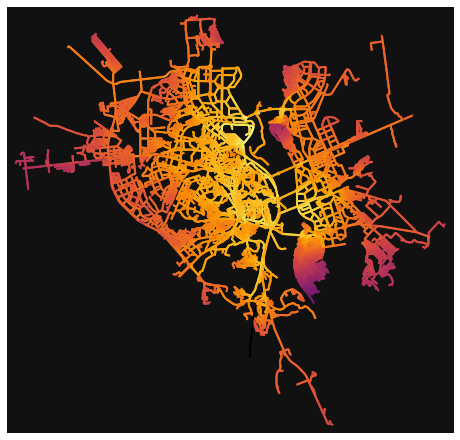

2022-01-13 23:41:42 Finished plotting the graph


In [12]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

## Routing

In [13]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

2022-01-13 23:41:42 Created edges GeoDataFrame from graph
2022-01-13 23:41:43 Created edges GeoDataFrame from graph


In [22]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, Y=50.376164350450786, X=30.45286517145002)
dest = ox.distance.nearest_nodes(G, Y=50.42001525943833, X=30.54822482016879)

2022-01-13 23:45:01 Created nodes GeoDataFrame from graph
2022-01-13 23:45:01 Created nodes GeoDataFrame from graph


2022-01-13 23:45:01 Begin plotting the graph...
2022-01-13 23:45:02 Created edges GeoDataFrame from graph
2022-01-13 23:45:03 Finished plotting the graph


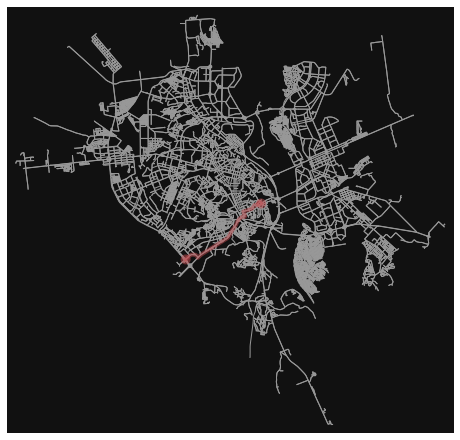

In [23]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [24]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.get_route_edge_attributes(G, route, "length")
round(sum(edge_lengths))

9639

In [25]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle_vec(orig_y, orig_x, dest_y, dest_x))

8352

You can add elevation attributes to your graph's nodes automatically with the `elevation` module, using either local raster files or the Google Maps Elevation API.

In [26]:
# add elevation to nodes automatically, calculate edge grades, plot network
# you need a google elevation api key to run this cell!
try:
    from keys import google_elevation_api_key

    G = ox.elevation.add_node_elevations_google(G, api_key=google_elevation_api_key)
    G = ox.elevation.add_edge_grades(G)
    nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
    fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color="#333")
except ImportError:
    print("You need a google_elevation_api_key to run this cell.")

You need a google_elevation_api_key to run this cell.


Nodes are colored from lowest elevation (dark blue) to highest (bright yellow).

Example: create [elevation-based](12-node-elevations-edge-grades.ipynb) impedance functions to route around hills.

## Get networks other ways

make queries less ambiguous to help the geocoder out, if it's not finding what you're looking for

2022-01-13 23:45:55 Pausing 1 seconds before making HTTP GET request
2022-01-13 23:45:56 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&city=Kyiv&country=Ukraine with timeout=180
2022-01-13 23:45:56 Resolved nominatim.openstreetmap.org to 184.104.226.109
2022-01-13 23:45:56 Downloaded 50.7kB from nominatim.openstreetmap.org
2022-01-13 23:45:57 Saved response to cache file "cache/56cfb5ead5ab7d4577782dfe7445172db8192e31.json"
2022-01-13 23:45:57 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:45:57 Constructed place geometry polygon(s) to query API
2022-01-13 23:45:57 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:45:57 Projected GeoDataFrame to epsg:4326
2022-01-13 23:45:57 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:45:57 Projected GeoDataFrame to epsg:4326
2022-01-13 23:45:57 Requesting dat

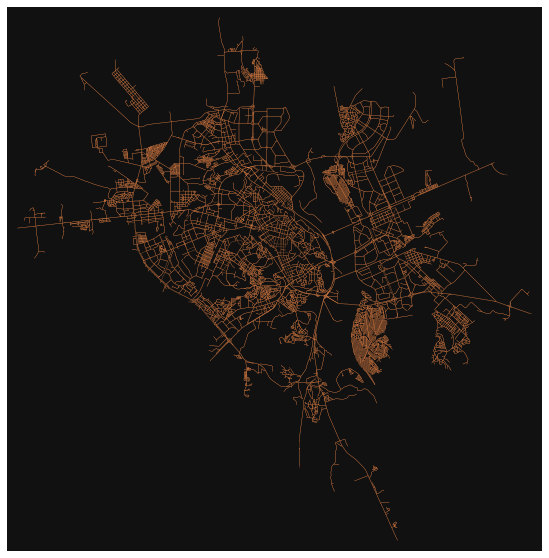

2022-01-13 23:46:06 Finished plotting the graph


In [27]:
# you can make query an unambiguous dict to help the geocoder find it
place = {"city": "Kyiv", "country": "Ukraine"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

2022-01-13 23:46:12 Pausing 1 seconds before making HTTP GET request
2022-01-13 23:46:13 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Sinalunga%2C+Italy with timeout=180
2022-01-13 23:46:13 Resolved nominatim.openstreetmap.org to 184.104.226.109
2022-01-13 23:46:14 Downloaded 15.1kB from nominatim.openstreetmap.org
2022-01-13 23:46:14 Saved response to cache file "cache/4e5011a0169aa2cae8159d880af897d013dad26f.json"
2022-01-13 23:46:14 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:46:14 Constructed place geometry polygon(s) to query API
2022-01-13 23:46:14 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:14 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:14 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:14 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:14 Requesting data wit

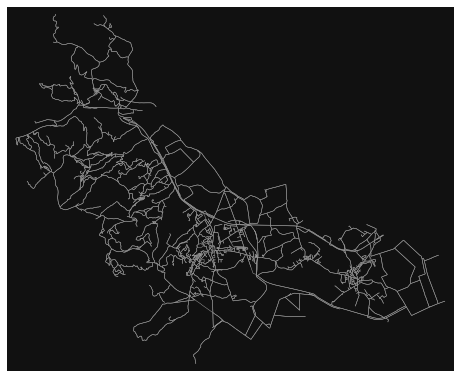

2022-01-13 23:46:21 Finished plotting the graph


In [28]:
# you can get networks anywhere in the world
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

2022-01-13 23:46:23 Created bbox 1609 m from (37.870605, -122.25483): 37.88507506419808,37.85613493580192,-122.23649952105367,-122.27316047894632
2022-01-13 23:46:23 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:23 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:23 Projected GeoDataFrame to +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:23 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:23 Requesting data within polygon from API in 1 request(s)
2022-01-13 23:46:23 Resolved overpass-api.de to 178.63.48.217
2022-01-13 23:46:23 Pausing 0 seconds before making HTTP POST request
2022-01-13 23:46:23 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28way%5B%22highway%22%5D%5B%22area%22%21~%22yes%22%5D%5B%22access%22%21~%22private%22%5D%5B%22highway%22%21~%22abandoned%7Cbridleway%7Cbus_guideway%7Cconstruction%7Ccorridor%7Ccycleway%7C

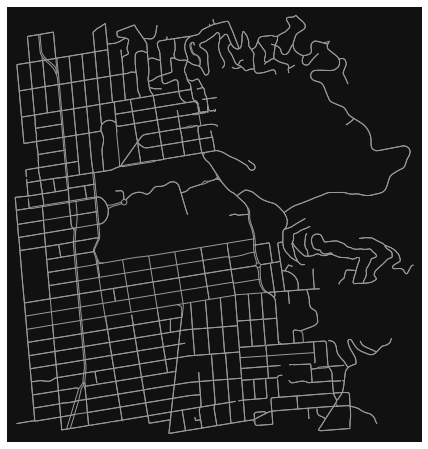

2022-01-13 23:46:27 Finished plotting the graph


In [29]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609  # meters
G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

Examples of [getting networks](01-overview-osmnx.ipynb) by coordinates, bounding box, or any custom polygon shape.

## Get other networked infrastructure types

...like rail or electric grids or even the canals of Venice and Amsterdam, using the `custom_filter` parameter: [see more examples](08-custom-filters-infrastructure.ipynb).

2022-01-13 23:46:53 Pausing 1 seconds before making HTTP GET request
2022-01-13 23:46:54 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Kyiv with timeout=180
2022-01-13 23:46:54 Resolved nominatim.openstreetmap.org to 184.104.226.109
2022-01-13 23:46:55 Downloaded 266.0kB from nominatim.openstreetmap.org
2022-01-13 23:46:55 Saved response to cache file "cache/d996f89a50b2bda978c2825799e8452c20e57101.json"
2022-01-13 23:46:55 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:46:55 Constructed place geometry polygon(s) to query API
2022-01-13 23:46:55 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:55 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:55 Projected GeoDataFrame to +proj=utm +zone=36 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:46:55 Projected GeoDataFrame to epsg:4326
2022-01-13 23:46:55 Requesting data within polygon f

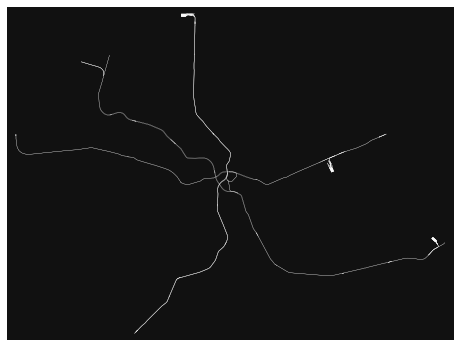

2022-01-13 23:47:03 Finished plotting the graph


In [30]:
# get NY subway rail network
G = ox.graph_from_place(
    "Kyiv",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

## Get any geospatial entities' geometries and attributes

Use the `geometries` module to download entities, such as local amenities, points of interest, or building footprints, and turn them into a GeoDataFrame: [see docs](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.geometries). For more usage examples of downloading geospatial objects from OSM, see [this notebook](16-download-osm-geospatial-entities.ipynb).

In [31]:
# get all building footprints in some neighborhood
place = "Bunker Hill, Los Angeles, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

2022-01-13 23:47:23 Pausing 1 seconds before making HTTP GET request
2022-01-13 23:47:24 Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Bunker+Hill%2C+Los+Angeles%2C+California with timeout=180
2022-01-13 23:47:24 Resolved nominatim.openstreetmap.org to 184.104.226.109
2022-01-13 23:47:24 Downloaded 1.2kB from nominatim.openstreetmap.org
2022-01-13 23:47:24 Saved response to cache file "cache/8d8366ad6b96fa854a9d6d038c022b8bdcdb6fe6.json"
2022-01-13 23:47:24 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:47:24 Constructed place geometry polygon(s) to query API
2022-01-13 23:47:24 Projected GeoDataFrame to +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:47:24 Projected GeoDataFrame to epsg:4326
2022-01-13 23:47:24 Requesting data within polygon from API in 1 request(s)
2022-01-13 23:47:24 Resolved overpass-api.de to 178.63.11.215
2022-01-13 23:47:25 Pausing 0 seconds before making HTT

(56, 47)

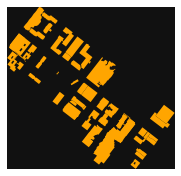

In [32]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

See the other notebooks for more examples of visualization with OSMnx.

In [33]:
# get all parks and bus stops in some neighborhood
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

2022-01-13 23:47:45 Retrieved response from cache file "cache/8d8366ad6b96fa854a9d6d038c022b8bdcdb6fe6.json"
2022-01-13 23:47:45 Created GeoDataFrame with 1 rows from 1 queries
2022-01-13 23:47:45 Constructed place geometry polygon(s) to query API
2022-01-13 23:47:45 Projected GeoDataFrame to +proj=utm +zone=11 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2022-01-13 23:47:45 Projected GeoDataFrame to epsg:4326
2022-01-13 23:47:45 Requesting data within polygon from API in 1 request(s)
2022-01-13 23:47:45 Resolved overpass-api.de to 178.63.48.217
2022-01-13 23:47:45 Pausing 0 seconds before making HTTP POST request
2022-01-13 23:47:45 Post https://overpass-api.de/api/interpreter?data=%5Bout%3Ajson%5D%5Btimeout%3A180%5D%3B%28%28node%5B%27leisure%27%3D%27park%27%5D%28poly%3A%2734.056122+-118.256052+34.054233+-118.253149+34.050990+-118.248100+34.053625+-118.245628+34.058656+-118.253434+34.057132+-118.255014+34.056122+-118.256052%27%29%3B%28._%3B%3E%3B%29%3B%29%3B%28way%5B%27leisur

(16, 20)

2022-01-13 23:47:48 16 geometries in the final GeoDataFrame


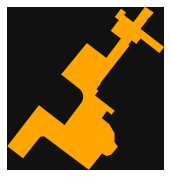

In [34]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))